<a href="https://colab.research.google.com/github/rafabandoni/nfl-predict/blob/main/notebooks/01_nfl_predict_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)

# 01. EDA (Exploratory data analysis)

## Load data

In [2]:
PATH = 'https://raw.githubusercontent.com/rafabandoni/nfl-predict/refs/heads/main/data/output/'

In [3]:
games_score_df = pd.read_parquet(PATH + 'games_stats_nfl.parquet')
games_score_df.head()

,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium_neutral,home_winner,defense_downs_3rd_att_home_,...,special_teams_punting_td_away_,special_teams_punting_int_away_,special_teams_punting_rate_away_,special_teams_punting_1st_away_,special_teams_punting_1st_perc_away_,special_teams_punting_20+_away_,special_teams_punting_40+_away_,special_teams_punting_lng_away_,special_teams_punting_sck_away_,special_teams_punting_scky_away_
0,2011-09-08,2011,False,Packers,42,34,Saints,False,True,213,...,33,22,90.8,236,0.357,47,10,-80,26,195
1,2011-09-11,2011,False,Cardinals,28,21,Panthers,False,True,233,...,9,21,57.0,125,0.258,30,3,88,50,346
2,2011-09-11,2011,False,Ravens,35,7,Steelers,False,True,229,...,22,9,95.2,175,0.365,62,11,56,43,289
3,2011-09-11,2011,False,Bears,30,12,Falcons,False,True,216,...,28,9,90.8,200,0.347,32,6,46,23,158
4,2011-09-11,2011,False,Browns,17,27,Bengals,False,False,224,...,26,20,82.4,206,0.349,45,9,-78,28,221


## Data understanding

In [12]:
games_score_df.describe()

,schedule_date,schedule_season,score_home,score_away,defense_downs_3rd_att_home_,defense_downs_3rd_md_home_,defense_downs_4th_att_home_,defense_downs_4th_md_home_,defense_downs_rec_1st_home_,defense_downs_rec_1st_perc_home_,defense_downs_rush_1st_home_,defense_downs_rush_1st_perc_home_,defense_downs_scrm_plys_home_,year_home_,defense_fumbles_ff_home_,defense_fumbles_fr_home_,defense_fumbles_fr_td_home_,defense_fumbles_rec_fum_home_,defense_fumbles_rush_fum_home_,defense_interceptions_int_home_,defense_interceptions_int_td_home_,defense_interceptions_int_yds_home_,defense_passing_att_home_,defense_passing_cmp_home_,defense_passing_cmp__perc_home_,defense_passing_yds/att_home_,defense_passing_yds_home_,defense_passing_td_home_,defense_passing_int_home_,defense_passing_rate_home_,defense_passing_1st_home_,defense_passing_1st_perc_home_,defense_passing_20+_home_,defense_passing_40+_home_,defense_passing_lng_home_,defense_passing_sck_home_,defense_receiving_rec_home_,defense_receiving_yds_home_,defense_receiving_yds/rec_home_,defense_receiving_td_home_,defense_receiving_20+_home_,defense_receiving_40+_home_,defense_receiving_lng_home_,defense_receiving_rec_1st_home_,defense_receiving_rec_1st_perc_home_,defense_receiving_rec_fum_home_,defense_receiving_pdef_home_,defense_rushing_att_home_,defense_rushing_rush_yds_home_,defense_rushing_ypc_home_,defense_rushing_td_home_,defense_rushing_20+_home_,defense_rushing_40+_home_,defense_rushing_lng_home_,defense_rushing_rush_1st_home_,defense_rushing_rush_1st_perc_home_,defense_rushing_rush_fum_home_,defense_scoring_fr_td_home_,defense_scoring_sfty_home_,defense_scoring_int_td_home_,defense_tackles_sck_home_,defense_tackles_comb_home_,defense_tackles_asst_home_,defense_tackles_solo_home_,offense_downs_3rd_att_home_,offense_downs_3rd_md_home_,offense_downs_4th_att_home_,offense_downs_4th_md_home_,offense_downs_rec_1st_home_,offense_downs_rec_1st_perc_home_,offense_downs_rush_1st_home_,offense_downs_rush_1st_perc_home_,offense_downs_scrm_plys_home_,offense_passing_att_home_,offense_passing_cmp_home_,offense_passing_cmp__perc_home_,offense_passing_yds/att_home_,offense_passing_pass_yds_home_,offense_passing_td_home_,offense_passing_int_home_,offense_passing_rate_home_,offense_passing_1st_home_,offense_passing_1st_perc_home_,offense_passing_20+_home_,offense_passing_40+_home_,offense_passing_lng_home_,offense_passing_sck_home_,offense_passing_scky_home_,offense_receiving_rec_home_,offense_receiving_yds_home_,offense_receiving_yds/rec_home_,offense_receiving_td_home_,offense_receiving_20+_home_,offense_receiving_40+_home_,offense_receiving_lng_home_,offense_receiving_rec_1st_home_,offense_receiving_rec_1st_perc_home_,offense_receiving_rec_fum_home_,offense_rushing_att_home_,offense_rushing_rush_yds_home_,offense_rushing_ypc_home_,offense_rushing_td_home_,offense_rushing_20+_home_,offense_rushing_40+_home_,offense_rushing_lng_home_,offense_rushing_rush_1st_home_,offense_rushing_rush_1st_perc_home_,offense_rushing_rush_fum_home_,offense_scoring_rsh_td_home_,offense_scoring_rec_td_home_,offense_scoring_tot_td_home_,offense_scoring_2-pt_home_,special_teams_field_goals_fgm_home_,special_teams_field_goals_att_home_,special_teams_field_goals_fg__perc_home_,special_teams_field_goals_1-19_>_percent_a_m_home_,special_teams_field_goals_20-29_>_percent_a_m_home_,special_teams_field_goals_30-39_>_percent_a_m_home_,special_teams_field_goals_40-49_>_percent_a_m_home_,special_teams_field_goals_50-59_>_percent_a_m_home_,special_teams_field_goals_60+_>_percent_a_m_home_,special_teams_field_goals_lng_home_,special_teams_field_goals_fg_blk_home_,special_teams_kickoff_returns_avg_home_,special_teams_kickoff_returns_ret_home_,special_teams_kickoff_returns_yds_home_,special_teams_kickoff_returns_kret_td_home_,special_teams_kickoff_returns_20+_home_,special_teams_kickoff_returns_40+_home_,special_teams_kickoff_returns_lng_home_,special_teams_kickoff_returns_fc_home_,special_teams_kickoff_returns_fum_home_,special_teams_

### Creating new columns

In [15]:
# Total points per game
games_score_df['total_score'] = games_score_df['score_home'] + games_score_df['score_away']

## Barplot

<ipython-input-76-52d605fbfff1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_wins'] = df['home_winner'].map({True : 1, False : 0})
<ipython-input-76-52d605fbfff1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_wins'] = df['home_winner'].map({True : 0, False : 1})


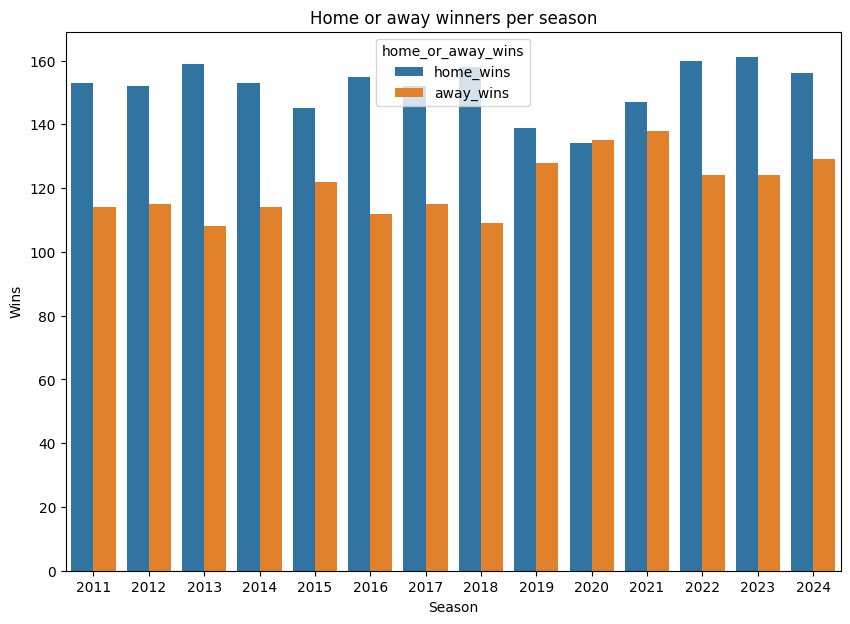

In [76]:
df = games_score_df[['schedule_season',
                     'home_winner']]
df['home_wins'] = df['home_winner'].map({True : 1, False : 0})
df['away_wins'] = df['home_winner'].map({True : 0, False : 1})
df = df.groupby('schedule_season', as_index=False).sum(numeric_only=True)
dfm = pd.melt(df[['schedule_season', 'home_wins', 'away_wins']], id_vars="schedule_season", var_name='home_or_away_wins', value_name='wins')

plt.figure(figsize=(10,7))
sns.barplot(
    data=dfm,
    x='schedule_season',
    y='wins',
    hue='home_or_away_wins'
)
plt.title('Home or away winners per season')
plt.ylabel('Wins')
plt.xlabel('Season')
plt.show()

## Time series

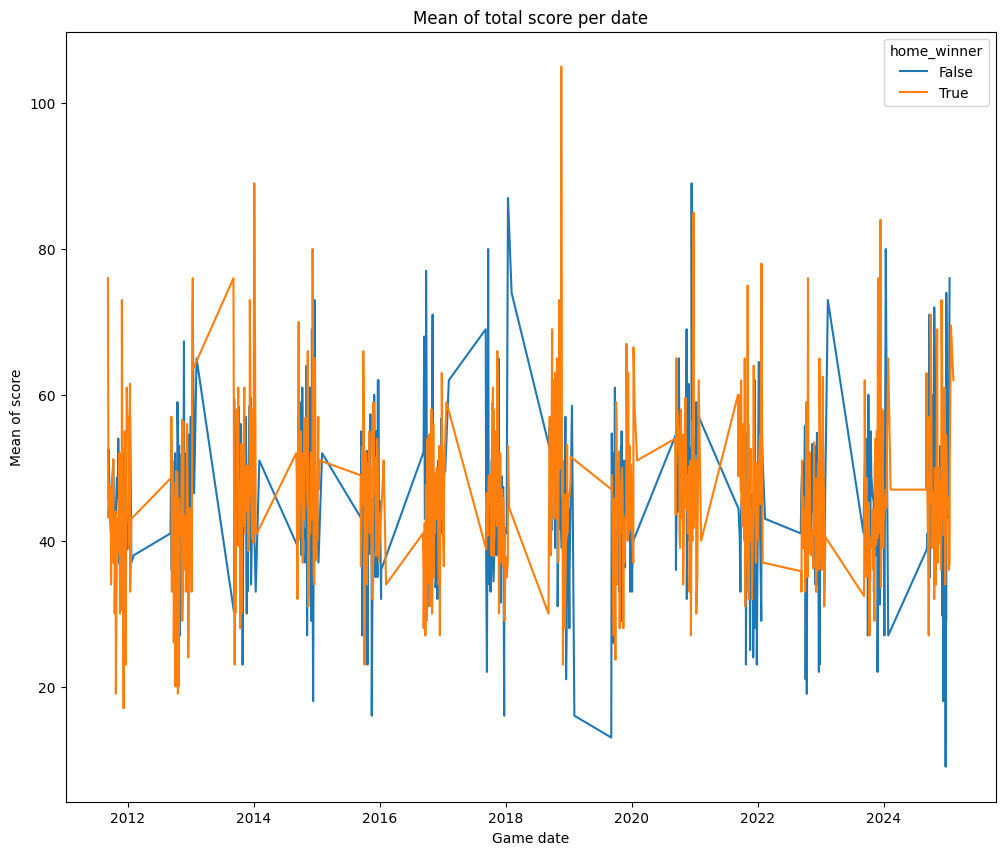

In [17]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'total_score']].groupby(['schedule_date',
                                              'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='total_score',
    hue='home_winner'
)
plt.title('Mean of total score per date')
plt.ylabel('Mean of score')
plt.xlabel('Game date')
plt.show()

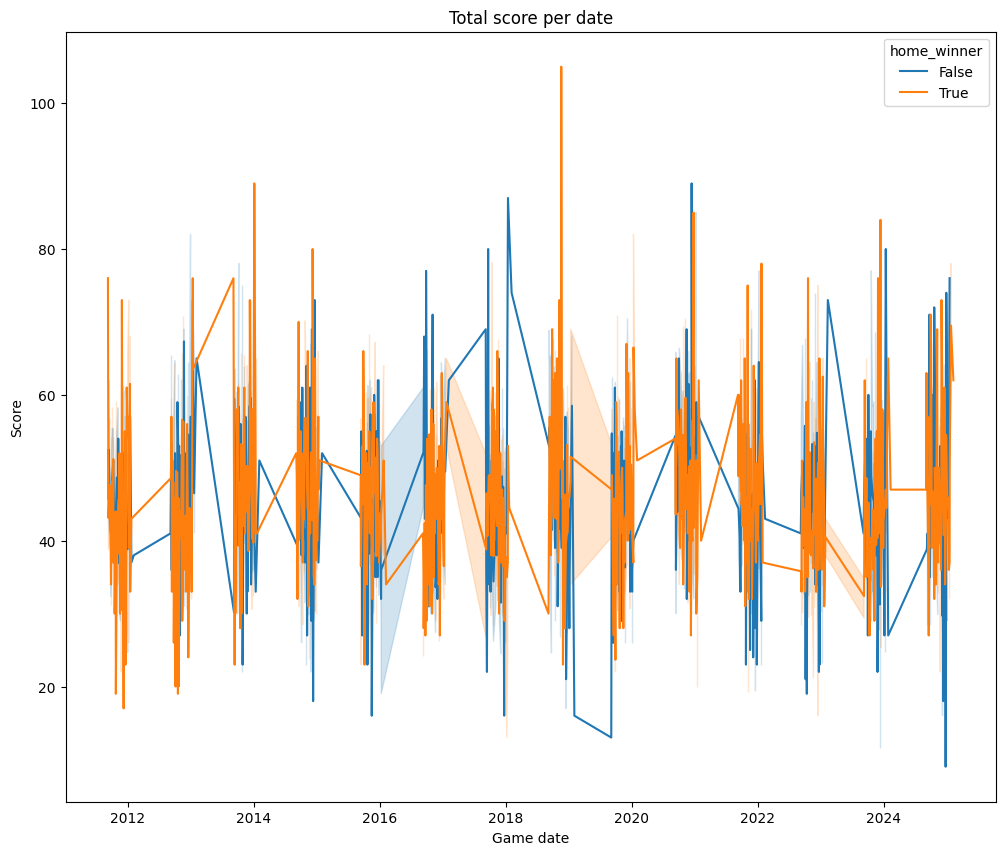

In [16]:
plt.figure(figsize=(12,10))
sns.lineplot(
    data=games_score_df,
    x='schedule_date',
    y='total_score',
    hue='home_winner'
)
plt.title('Total score per date')
plt.ylabel('Score')
plt.xlabel('Game date')
plt.show()

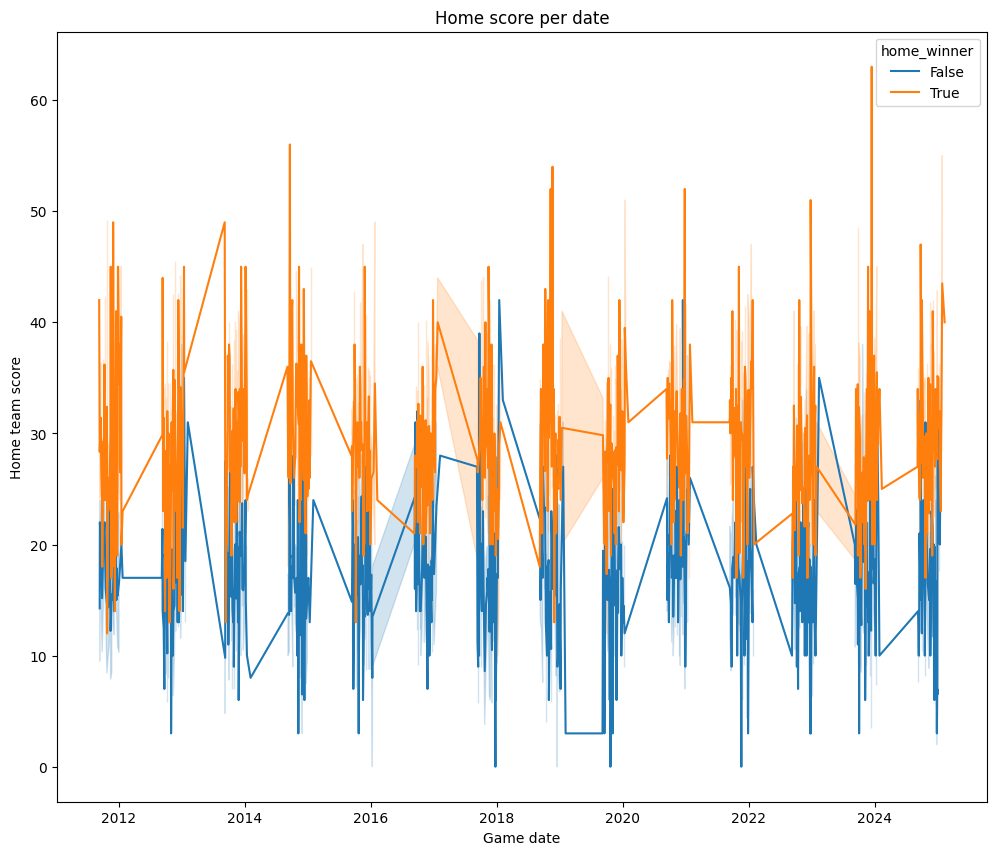

In [6]:
plt.figure(figsize=(12,10))
sns.lineplot(
    data=games_score_df,
    x='schedule_date',
    y='score_home',
    hue='home_winner'
)
plt.title('Home score per date')
plt.ylabel('Home team score')
plt.xlabel('Game date')
plt.show()

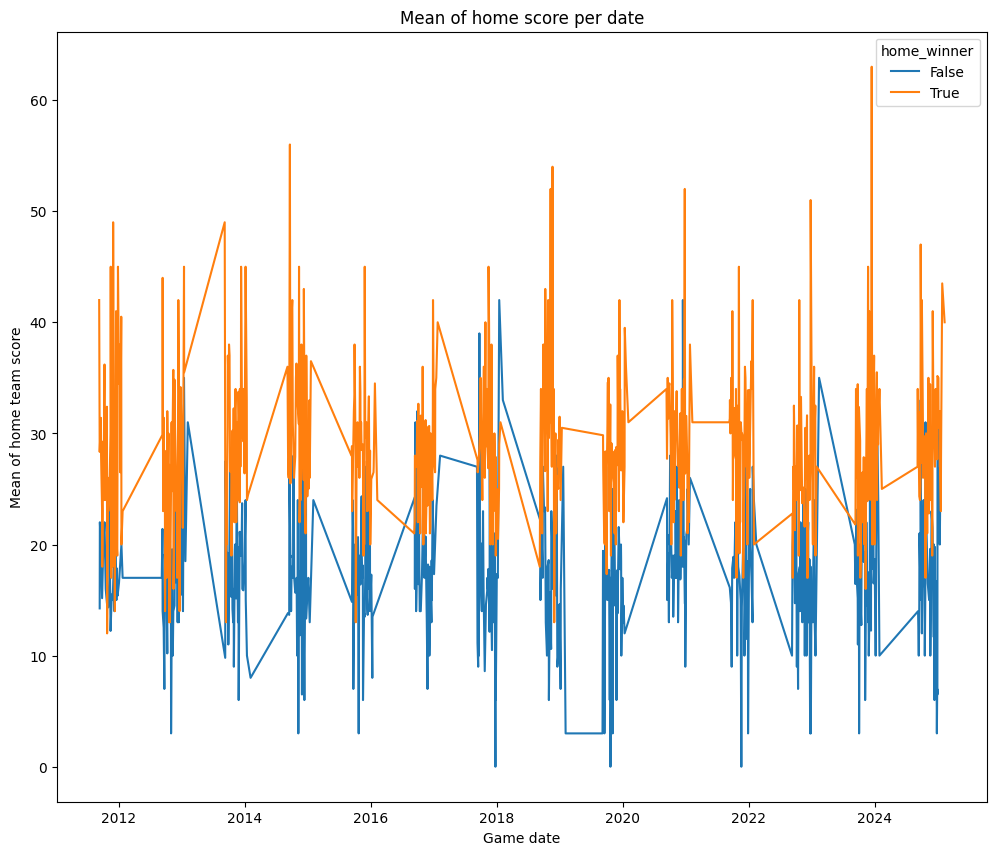

In [13]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'score_home']].groupby(['schedule_date',
                                             'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='score_home',
    hue='home_winner'
)
plt.title('Mean of home score per date')
plt.ylabel('Mean of home team score')
plt.xlabel('Game date')
plt.show()

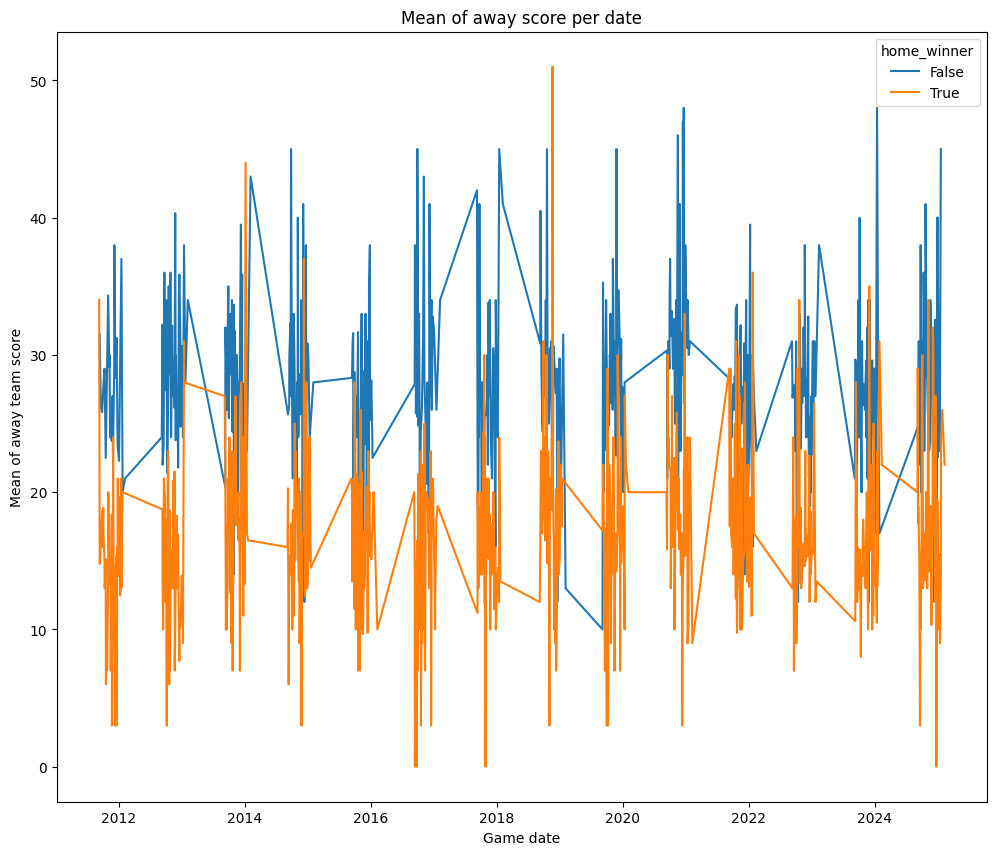

In [14]:
df = games_score_df[['schedule_date',
                     'home_winner',
                     'score_away']].groupby(['schedule_date',
                                             'home_winner'], as_index=False).mean()

plt.figure(figsize=(12,10))
sns.lineplot(
    data=df,
    x='schedule_date',
    y='score_away',
    hue='home_winner'
)
plt.title('Mean of away score per date')
plt.ylabel('Mean of away team score')
plt.xlabel('Game date')
plt.show()

## Distribuition

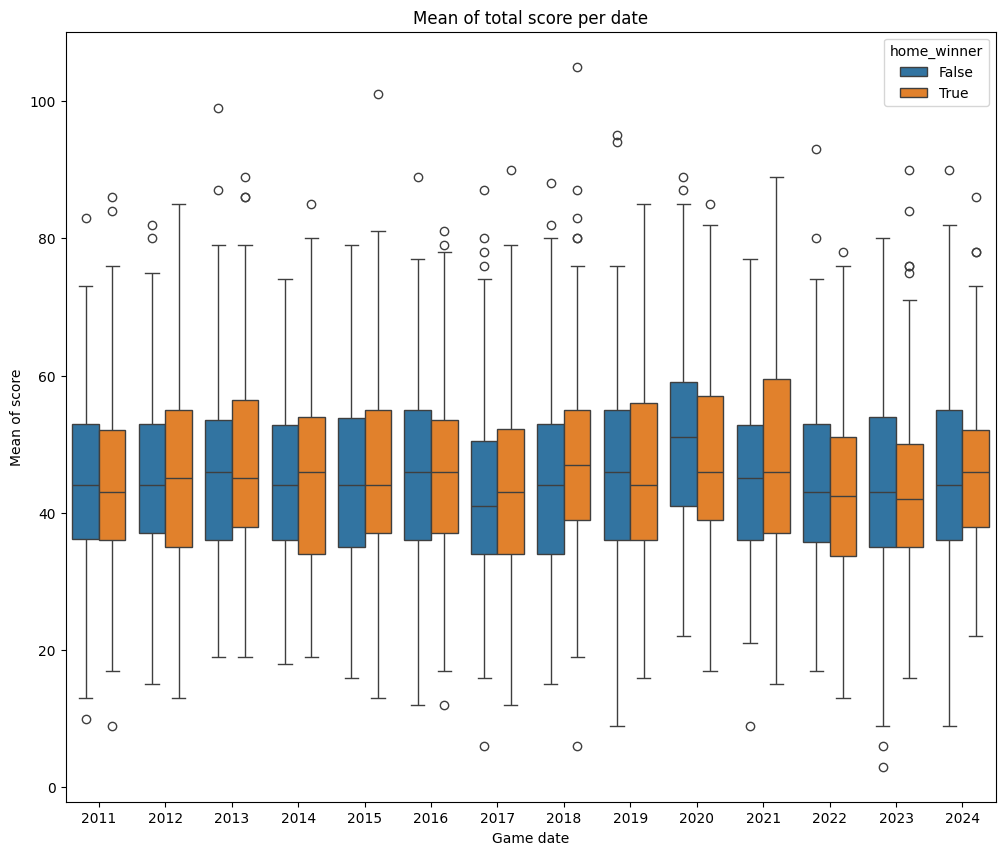

In [22]:
plt.figure(figsize=(12,10))
sns.boxplot(
    data=games_score_df,
    x='schedule_season',
    y='total_score',
    hue='home_winner'
)
plt.title('Mean of total score per date')
plt.ylabel('Mean of score')
plt.xlabel('Game date')
plt.show()

## Correlation